In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.__version__

'3.5.3'

In [2]:
from pos_gen import get_random_points_in_circle, get_small_err

N = int(1e5)
radius = 50.
resolution = 0.5

true_pos = get_random_points_in_circle(n=N, radius=radius)
err = get_small_err(n=N, scale = resolution)
data_pos = true_pos+err

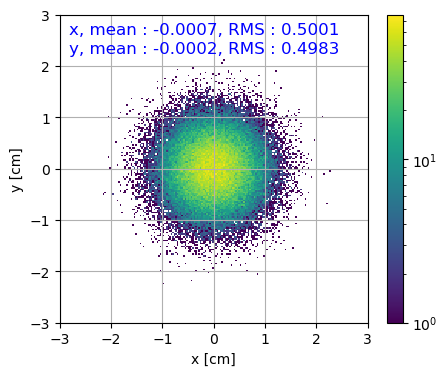

In [5]:
from plotting import Plot2dError

fig, ax = plt.subplots(figsize = (5,4))
h = Plot2dError(data_pos, true_pos, ax)
fig.colorbar(h, ax = ax)
plt.show()